In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.gridspec as gridspec
import textwrap
import os
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import seaborn as sns

all_data = pd.read_csv('all_data.csv')

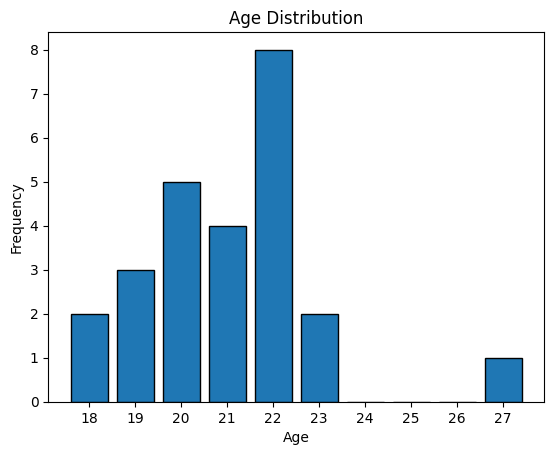

In [56]:

unique_age_df = all_data.drop_duplicates(subset=['Name', 'Age'])

bin_edges = np.arange(min(unique_age_df['Age']) - 0.5, max(unique_age_df['Age']) + 1.5, 1)

plt.hist(unique_age_df['Age'], bins=bin_edges, edgecolor='k', rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Add an offset to the x-axis ticks to position them in the middle of the bars
plt.xticks(np.arange(min(unique_age_df['Age']), max(unique_age_df['Age']) + 1, 1))

plt.show()


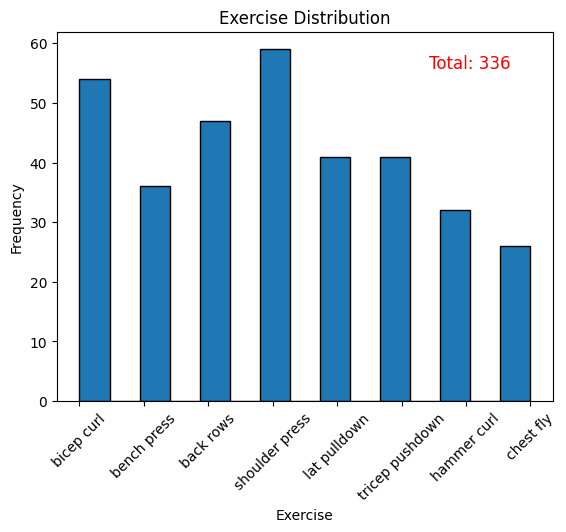

In [44]:
plt.hist(all_data['Exercise Selected'], bins=15, edgecolor='k')
plt.xlabel('Exercise')
plt.xticks(rotation=45) 
plt.ylabel('Frequency')
plt.title('Exercise Distribution')
exercise_data = all_data['Exercise Selected']
plt.text(0.75, 0.9, f'Total: {len(all_data)}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.show()

In [45]:
dfPage = 2
all_data.loc[dfPage*50:(dfPage+1)*50,['Set', 'Name', 'Exercise Selected', 'Load', 'Reps', 'RPE', 'Remarks', 'Duration', 'Id','Years Trained']]

,Set,Name,Exercise Selected,Load,Reps,RPE,Remarks,Duration,Id,Years Trained
100,3,josh cabrera,shoulder press,90 kg,6,10,sitted,62977,2023-09-05 11:09:16,2.0
101,1,josh cabrera,hammer curl,80 lb,12,10,cable,28336,2023-09-05 11:13:45,2.0
102,2,josh cabrera,hammer curl,80 lb,10,10,cable,33661,2023-09-05 11:15:09,2.0
103,3,josh cabrera,hammer curl,80 lb,12,10,NaN,30575,2023-09-05 11:17:32,2.0
104,1,josh cabrera,bicep curl,14 kg,12,10,NaN,25091,2023-09-05 11:22:42,2.0
105,2,josh cabrera,bicep curl,14 kg,12,10,NaN,21665,2023-09-05 11:24:57,2.0
106,3,josh cabrera,bicep curl,14 kg,12,10,NaN,23247,2023-09-05 11:26:33,2.0
107,1,josh cabrera,chest fly,40 lb,10,10,NaN,43378,2023-09-05 11:29:13,2.0
108,2,josh cabrera,chest fly,40 lb,10,10,NaN,27660,2023-09-05 11:31:10,2.0
109,3,josh cabrera,chest fly,40 lb,10,10,NaN,30432,2023-09-05 11:33:07,2.0


In [46]:
all_data['Exercise Selected'].unique()

array(['bicep curl', 'bench press', 'back rows', 'shoulder press',
       'lat pulldown', 'tricep pushdown', 'hammer curl', 'chest fly'],
      dtype=object)